In [1]:
from random import choice 
from itertools import combinations

In [2]:
parejas = list(combinations(range(200),2))
choice(parejas)

(121, 168)

In [3]:
from Bio import SeqIO
import subprocess
from io import StringIO

In [4]:
seqs = list(SeqIO.parse('bichoE6.fa','fasta'))

In [5]:
len(seqs)

200

In [6]:
pareja = choice(parejas)
seq1 = seqs[pareja[0]]
seq2 = seqs[pareja[1]]


In [7]:
conast1 = str(seq1.seq)
list1 = conast1.split('***')
list1

['',
 'AGCTCAGTGCCGCCCCCCCGGTTGCGTAAAAGTGCTGGATTTTCTCTAAGAATGCTCCACCCTACGATCGCCTGCAAATAAGCCAGTGCTAGGGTTGTGCTTACTACCGATTGGGGAGTTTCAATCAGACAACCTCCCCTACAGACCGCTGTGTACAGTAGATCAGCCGGTATCCGTTTTCCAAAGTGTTGTTAGCAAGCTTTGTCGTGTGACGGCTCTTTTTCGAATGCCTGTTTTGGTGGACACCATTTCTACGCAGTGGAAAGGGAAATCGACGAAATAGACTATAATTGAGCGCGGGTATGGACGATGGTCGCTAACCAGTGTGAAAGGAGGAATCCCTACTTCGGACAAAATAAGCCTGCCCATACGACCACCCCCCTCGGTATATCAAGCGCCCGCGGACTGGAACGGTGATTAGTGTTTCCTTTCCCTTATAAATCCTAGTTATCAAACTATGAAAAGTCCTAATAATGGGGCCGTTGTTAGTTACATGGGTG',
 'TGCTTGTCTTCTCATGGCCCGCCTAACTGCTGATGGAATTGTAAGAACGTCATCGAATGCGAGATTCTACGGTAGTTCATGGCTGGATATACGTTTTCGCGACAAGTTGACGCTAGGACGTACGATATGTGTTTACTCACATGGATCACCGATAATCTCGAACGCCGGTATGCCGTAAGCTAAGGTCACCTGCCTTCTCTCTCATACAAACCTTAGGGGCAACGCAGGGCTAACCAATACACGGATCTCCAGAGAAACTGTTTGTATTAAGGGCGGTCACCTGTCTACCCGATGCTTCTTGGATGCCGTTTTGCACTAATTCAAATATAGTTCTGGTTCTCTGCGAAGACTCACCTCAAATTACTGCGTGTGTACGCGGTCGCGACTGCATAGCTGATGCGGACAGTTGCCGGGGACGAGCAGATCTAGGTCCTGGAATCTTCCGCTACAACTTGGCATCTGTAATGGTTACCTCATCACGGCACATT

In [8]:
conast2 = str(seq2.seq)
list2 = conast2.split('***')

In [9]:
indice = choice(range(3))
indice

2

In [10]:

from skbio import Sequence
from skbio.sequence.distance import hamming 
#hamming (Sequence(str(A)),Sequence(str(B)))

In [11]:
len(list1[indice + 1]), len(list2[indice + 1])

(500, 500)

In [12]:
list1[2]

'TGCTTGTCTTCTCATGGCCCGCCTAACTGCTGATGGAATTGTAAGAACGTCATCGAATGCGAGATTCTACGGTAGTTCATGGCTGGATATACGTTTTCGCGACAAGTTGACGCTAGGACGTACGATATGTGTTTACTCACATGGATCACCGATAATCTCGAACGCCGGTATGCCGTAAGCTAAGGTCACCTGCCTTCTCTCTCATACAAACCTTAGGGGCAACGCAGGGCTAACCAATACACGGATCTCCAGAGAAACTGTTTGTATTAAGGGCGGTCACCTGTCTACCCGATGCTTCTTGGATGCCGTTTTGCACTAATTCAAATATAGTTCTGGTTCTCTGCGAAGACTCACCTCAAATTACTGCGTGTGTACGCGGTCGCGACTGCATAGCTGATGCGGACAGTTGCCGGGGACGAGCAGATCTAGGTCCTGGAATCTTCCGCTACAACTTGGCATCTGTAATGGTTACCTCATCACGGCACATTATGACATAAACA'

In [13]:
hamming(Sequence(list1[indice + 1]),Sequence(list2[indice + 1]))

0.068

In [14]:
def distancia_una(): 
    parejas = list(combinations(range(100),2))
    pareja = choice(parejas)
    seq1 = seqs[pareja[0]]
    seq2 = seqs[pareja[1]]
    conast1 = str(seq1.seq)
    list1 = conast1.split('***')
    conast2 = str(seq2.seq)
    list2 = conast2.split('***')
    indice = choice(range(3))
    return hamming(Sequence(list1[indice + 1]),Sequence(list2[indice + 1]))

In [15]:
distancia_una()

0.194

In [16]:
mil_veces = [distancia_una() for _ in range(1000)]

Text(0.5, 1.0, 'HistogramaE6')

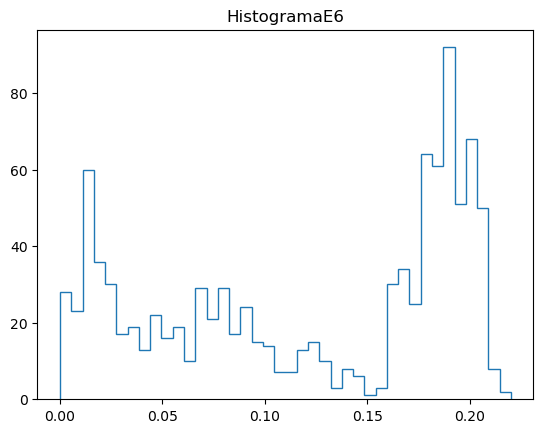

In [17]:
import numpy as np
import matplotlib.pyplot as plt

counts, bins = np.histogram(mil_veces, bins=40)
plt.stairs(counts, bins)
plt.title("HistogramaE6")

In [18]:
with open("ResultsE6.txt","a+") as file_object:
    file_object.seek(0)
    data=file_object.read(100)
    if len(data)>0:
        file_object.write("\n")
    file_object.write(str(mil_veces))


Text(0.5, 1.0, 'Histograma')

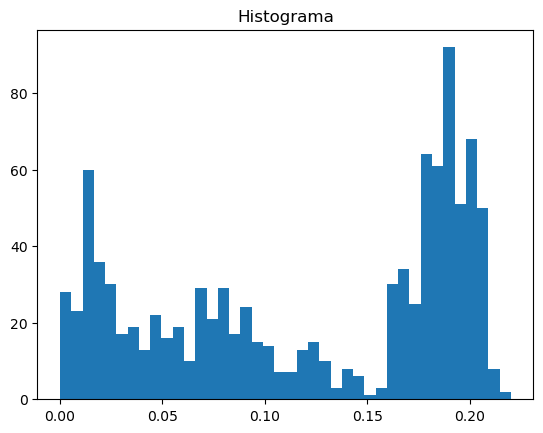

In [19]:
plt.hist(mil_veces, bins=40)
plt.title("Histograma")

In [20]:
plt.savefig('histo.png')

<Figure size 640x480 with 0 Axes>